# **CAPSTONE PROJECT | EMPLOYEE RETENTION PREDICTION**

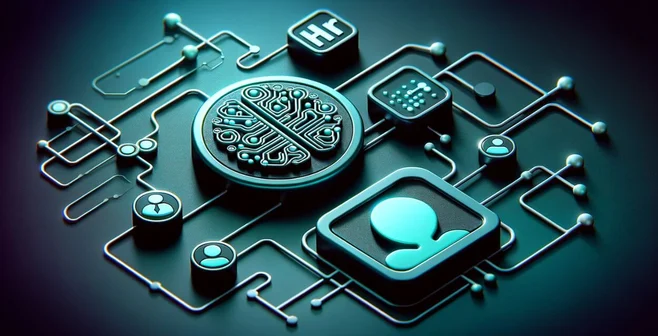

# **Problem**
In this project, we analyze a dataset containing demographic, educational, professional, and organizational attributes of data scientists, such as experience, training hours, company size, education level, and job history. The goal here will be to identify a model that can correctly predict whether an individual intends to switch to another company or not. Because failing to identify employees who are at risk of leaving can negatively impact workforce planning and retention strategies, the model should put more emphasis on effectively capturing the cases of interest, making recall for the job-change class an important metric to evaluate.

# **Objective**

*  **Examine the Dataset:**
Gain insight into demographic, educational, professional, and organizational characteristics of data scientists to identify patterns, distributions, and trends associated with job transition behavior.
* **Perform Extensive Exploratory Data Analysis (EDA):**
Examine the relationships of various characteristics with the target variable to conclude key factors in decisions on employee job change.
* **Preprocessing Steps:**
Omit non-relevant features such as unique identifier
Treat missing values properly in numerical and categoric variables
Identify and remove outliers if present
Use proper encoding methods for categoric variables
Use scaling on numerical variables to improve model performance if necessary
* **Model Building:**
Create preprocessing and modeling pipelines for consistency and efficiency
Implement and compare classification models including Logistic Regression, Random Forest, and XGBoost
Focus on effectively identifying employees who are likely to seek a job change, emphasizing recall for the job-change class
Evaluate and Compare Model Performance:
Assess model effectiveness using evaluation metrics such as accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrices to select the best-performing model.



# **Table of contents**
1. [Import Libraries](https://colab.research.google.com/drive/1n3P6O5E19239vJAygqX_6H52dYctZ54O?usp=sharing)
2. [Load Datasets](https://colab.research.google.com/drive/1n3P6O5E19239vJAygqX_6H52dYctZ54O?usp=sharing)
3. [Dataset Overview](https://colab.research.google.com/drive/1n3P6O5E19239vJAygqX_6H52dYctZ54O?usp=sharing)
4. [Exploratory Data Analysis](EDA)
   - [Target Distribution](https://colab.research.google.com/drive/1n3P6O5E19239vJAygqX_6H52dYctZ54O?usp=sharing)
5. [Data Preprocessing](https://colab.research.google.com/drive/1n3P6O5E19239vJAygqX_6H52dYctZ54O?usp=sharing)
   - [Missing Values](https://colab.research.google.com/drive/1n3P6O5E19239vJAygqX_6H52dYctZ54O?usp=sharing)
   - [Encoding](https://colab.research.google.com/drive/1n3P6O5E19239vJAygqX_6H52dYctZ54O?usp=sharing)
   - [Scaling](https://colab.research.google.com/drive/1n3P6O5E19239vJAygqX_6H52dYctZ54O?usp=sharing)
6. [Handling Imbalanced Data](SMOTE)
7. [Model Building](https://colab.research.google.com/drive/1n3P6O5E19239vJAygqX_6H52dYctZ54O?usp=sharing)
   - [Logistic Regression](https://colab.research.google.com/drive/1n3P6O5E19239vJAygqX_6H52dYctZ54O?usp=sharing)
   - [Random Forest](https://colab.research.google.com/drive/1n3P6O5E19239vJAygqX_6H52dYctZ54O?usp=sharing)
   - [XGBoost](https://colab.research.google.com/drive/1n3P6O5E19239vJAygqX_6H52dYctZ54O?usp=sharing)
8. [Model Comparison](https://colab.research.google.com/drive/1n3P6O5E19239vJAygqX_6H52dYctZ54O?usp=sharing)

9. [Prediction on Test Data](https://colab.research.google.com/drive/1n3P6O5E19239vJAygqX_6H52dYctZ54O?usp=sharing)
10. [Conclusion](https://colab.research.google.com/drive/1n3P6O5E19239vJAygqX_6H52dYctZ54O?usp=sharing)



# **Step 1 | Import Liberies**

In [ ]:
# Step 1
# Data handling
import pandas as pd
import numpy as np

# Stastic
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

# Lable Encoding
from sklearn.preprocessing import LabelEncoder

# SMOTENC
from imblearn.over_sampling import SMOTENC

# Standard Scaling
from sklearn.preprocessing import StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc


# **Visualization:**
It's use to to enhance the visual quality and readability of plots by improving resolution and applying a clean, professional styling.

In [ ]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200

# Configure Seaborn plot styles: Set background color and use dark| grid
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

# **Step 2 | Read Data Set**

In [ ]:
# Read Data Set
# Train Data set
train_df = pd.read_csv("aug_train.csv")
test_df = pd.read_csv("aug_test.csv")

# Check shape
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (19158, 14)
Test shape: (2129, 13)


In [ ]:
# View first 5 rows
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# **Data Set Description**
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __enrollee_id__ | Enrollement no of the employee |
| __city_development_index__ | Development index of the city where the candidate resides (higher value indicates better development) |
| __relevent_experience__ | Whether the candidate has relevant work experience (0 = No, 1 = Yes) |
| __education_level__ |Highest education level attained by the candidate (encoded categorical variable)|
| __experience__ | Total years of professional experience of the candidate |                     
| __last_new_job__ | Number of years since the candidate last changed jobs |
| __training_hours__ | Total number of training hours completed by the candidate|  
| __target__ | Job change status (0 = Will not change job, 1 = Will change job) |                      


# **Step 3 | Data Set Overview**
## **Step 3.1 | Dataset Basic Information**

In [ ]:
# Check Column Name and Type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# **Inferances :**


*   Number of Entries:
The dataset consists of 19,158 entries, ranging from index 0 to 19,157.

*  Columns:
There are 14 columns in the dataset representing candidate demographic details, education background, professional experience, training information, and the target variable.

*  Data Types:
    * The dataset includes 10 categorical (object) columns.
    * There are 2 integer (int64) columns (enrollee_id, training_hours).
    * There are 2 floating-point (float64) columns (city_development_index, target).

* Missing Values:
The dataset contains missing values in several categorical columns such as gender, enrolled_university, education_level, major_discipline, experience, company_size, company_type, and last_new_job, while all numerical columns have no missing values.





<span style="font-size:130%; color:sea green"> # **Note:** </span>
Based on the data types and feature descriptions, several columns in the dataset are stored as object data types but represent categorical information rather than true textual data. These features include
city, gender, relevent_experience, enrolled_university, education_level, major_discipline, experience, company_size, company_type, and last_new_job.

Although these variables are categorical in nature, they need to be encoded into numerical format before model training, as machine learning algorithms require numerical inputs. Appropriate encoding techniques will be applied during the data preprocessing stage.

In [ ]:
def convert_experience(x):
    if x == '<1':
        return 0
    elif x == '>20':
        return 21
    else:
        return float(x)

train_df['experience'] = train_df['experience'].apply(convert_experience)
test_df['experience'] = test_df['experience'].apply(convert_experience)

In [ ]:
def convert_last_new_job(x):
    if x == '>4':
        return 5
    elif x == 'never':
        return 0
    else:
        return float(x)

train_df['last_new_job'] = train_df['last_new_job'].apply(convert_last_new_job)
test_df['last_new_job'] = test_df['last_new_job'].apply(convert_last_new_job)

In [ ]:
num_cols = ['experience', 'last_new_job']

for col in num_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(train_df[col].median())

In [ ]:
cat_cols = [
    'gender',
    'enrolled_university',
    'education_level',
    'major_discipline',
    'company_type',
    'company_size',
    'city'
]

for col in cat_cols:
    train_df[col] = train_df[col].fillna('Unknown')
    test_df[col] = test_df[col].fillna('Unknown')

In [ ]:
mapping = {
    'Has relevent experience': 1,
    'No relevent experience': 0
}

train_df['relevent_experience'] = train_df['relevent_experience'].map(mapping)
test_df['relevent_experience'] = test_df['relevent_experience'].map(mapping)

In [ ]:
# Define continuous numerical features
continuous_features = ['city_development_index', 'training_hours']

# Define discrete numerical (identifier) feature
discrete_features = ['enrollee_id']

continuous_features, discrete_features

(['city_development_index', 'training_hours'], ['enrollee_id'])

#**Step 3.2 | Summary Statistics for Numerical Variables**

In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
relevent_experience,19158.0,0.719908,0.449056,0.000,0.00,1.000,1.00,1.000
experience,19158.0,10.096409,6.765820,0.000,4.00,9.000,16.00,21.000
last_new_job,19158.0,1.978338,1.663502,0.000,1.00,1.000,3.00,5.000
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [ ]:
print("CHI-SQUARE TEST RESULTS\n")

# Redefine categorical_features to use column names from the `cat_cols` list
categorical_features_names = [
    'gender',
    'relevent_experience',
    'enrolled_university',
    'education_level',
    'major_discipline',
    'company_size',
    'company_type',
    'city'
]

for feature in categorical_features_names:
    contingency_table = pd.crosstab(train_df[feature], train_df['target'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Feature: {feature}")
    print(f"Chi-square value: {chi2:.4f}")
    print(f"P-value: {p:.6f}")
    print("-" * 40)

CHI-SQUARE TEST RESULTS

Feature: gender
Chi-square value: 117.3772
P-value: 0.000000
----------------------------------------
Feature: relevent_experience
Chi-square value: 315.3386
P-value: 0.000000
----------------------------------------
Feature: enrolled_university
Chi-square value: 463.5337
P-value: 0.000000
----------------------------------------
Feature: education_level
Chi-square value: 167.2714
P-value: 0.000000
----------------------------------------
Feature: major_discipline
Chi-square value: 64.2199
P-value: 0.000000
----------------------------------------
Feature: company_size
Chi-square value: 1161.9575
P-value: 0.000000
----------------------------------------
Feature: company_type
Chi-square value: 959.8300
P-value: 0.000000
----------------------------------------
Feature: city
Chi-square value: 2998.7772
P-value: 0.000000
----------------------------------------


In [ ]:
group_0 = train_df[train_df['target'] == 0]['city_development_index']
group_1 = train_df[train_df['target'] == 1]['city_development_index']

f_statistic, p_value = f_oneway(group_0, group_1)

print(f"ANOVA F-statistic for city_development_index: {f_statistic:.2f}")
print(f"ANOVA P-value for city_development_index: {p_value:.3f}")

if p_value < 0.05:
    print("There is a statistically significant difference in city_development_index between the two target groups.")
else:
    print("There is no statistically significant difference in city_development_index between the two target groups.")

ANOVA F-statistic for city_development_index: 2531.72
ANOVA P-value for city_development_index: 0.000
There is a statistically significant difference in city_development_index between the two target groups.


In [ ]:
print("\nANOVA TEST RESULTS\n")

# Define numerical_features using the previously identified continuous_features
numerical_features = continuous_features

# Also define 'target' as it's used in the loop
target = 'target'

for feature in numerical_features:
    group_0 = train_df[train_df[target] == 0][feature]
    group_1 = train_df[train_df[target] == 1][feature]

    f_stat, p_value = f_oneway(group_0, group_1)

    print(f"Feature: {feature}")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.6f}")
    print("-" * 40)


ANOVA TEST RESULTS

Feature: city_development_index
F-statistic: 2531.7162
P-value: 0.000000
----------------------------------------
Feature: training_hours
F-statistic: 8.9228
P-value: 0.002820
----------------------------------------


In [ ]:
# Perform ANOVA using statsmodels to get a detailed ANOVA table
model = ols('city_development_index ~ C(target)', data=train_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)

,sum_sq,df,F,PR(>F)
C(target),34.032182,1.0,2531.716218,0.0
Residual,257.501402,19156.0,NaN,NaN


# **Numerical Features**



In [ ]:
train_df.describe(include='object')

,city,gender,enrolled_university,education_level,major_discipline,company_size,company_type
count,19158,19158,19158,19158,19158,19158,19158
unique,123,4,4,6,7,9,7
top,city_103,Male,no_enrollment,Graduate,STEM,Unknown,Pvt Ltd
freq,4355,13221,13817,11598,14492,5938,9817


# **Catagorical Features**

# **Step 4 | Exploratary Data Analysis**

In [ ]:
# Check Missing Value
train_df.isnull().sum()
(train_df.isnull().sum() / len(train_df)) * 100

,0
enrollee_id,0.0
city,0.0
city_development_index,0.0
gender,0.0
relevent_experience,0.0
enrolled_university,0.0
education_level,0.0
major_discipline,0.0
experience,0.0
company_size,0.0


# **Inferses**
Here we visualize the datas in hisplot, subplot, barplot, countplot and box plot for better understanding.

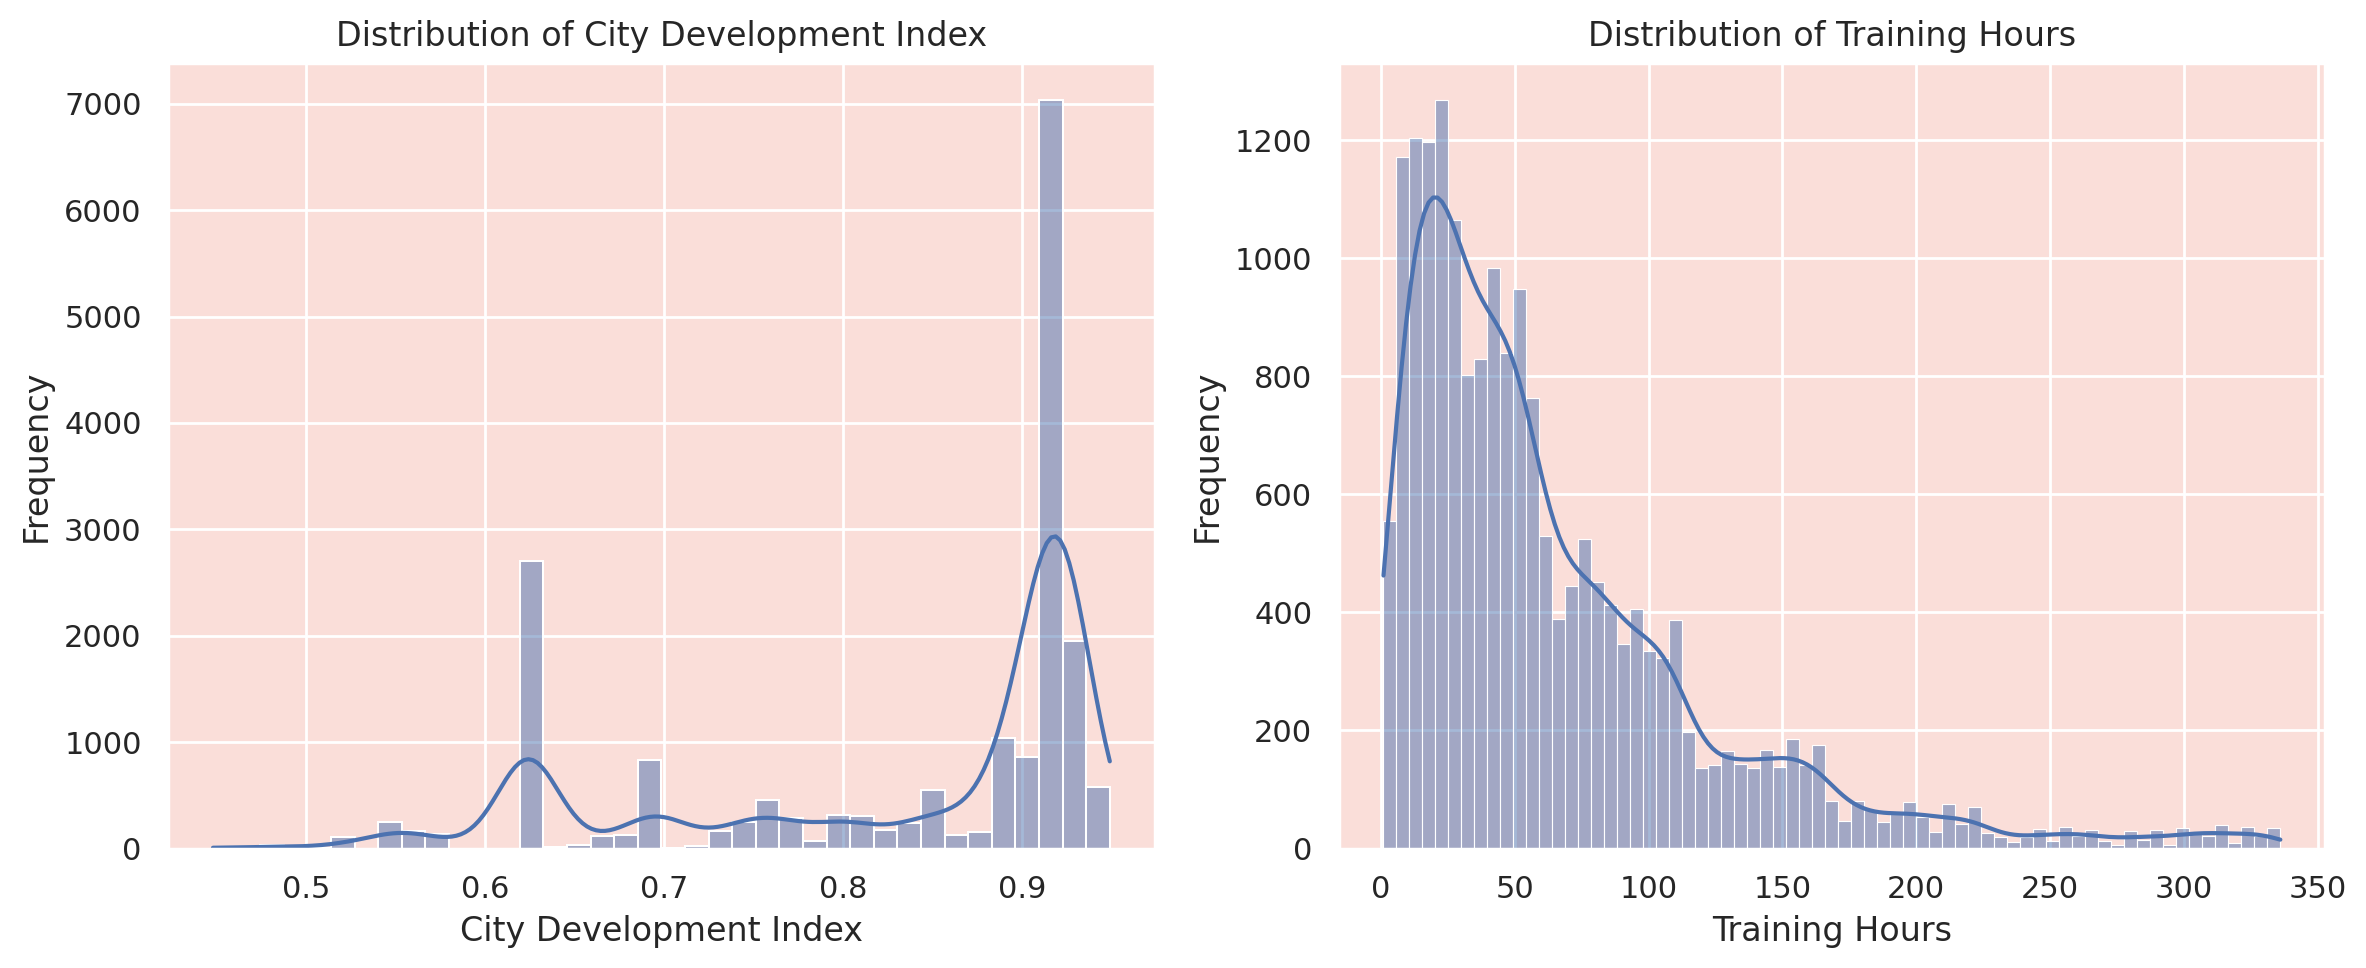

In [ ]:
plt.figure(figsize=(12, 5))

for i, col in enumerate(continuous_features):
    plt.subplot(1, 2, i + 1)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2320167580.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=train_df, order=train_df[col].value_counts().index, palette='Set2')
/tmp/ipython-input-2320167580.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=train_df, order=train_df[col].value_counts().index, palette='Set2')
/tmp/ipython-input-2320167580.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=train_df, order=train_df[col].value_counts().index, palette='Set2')
/tmp/ipython-input-2320167580.py:5: FutureWarning: 

Pa

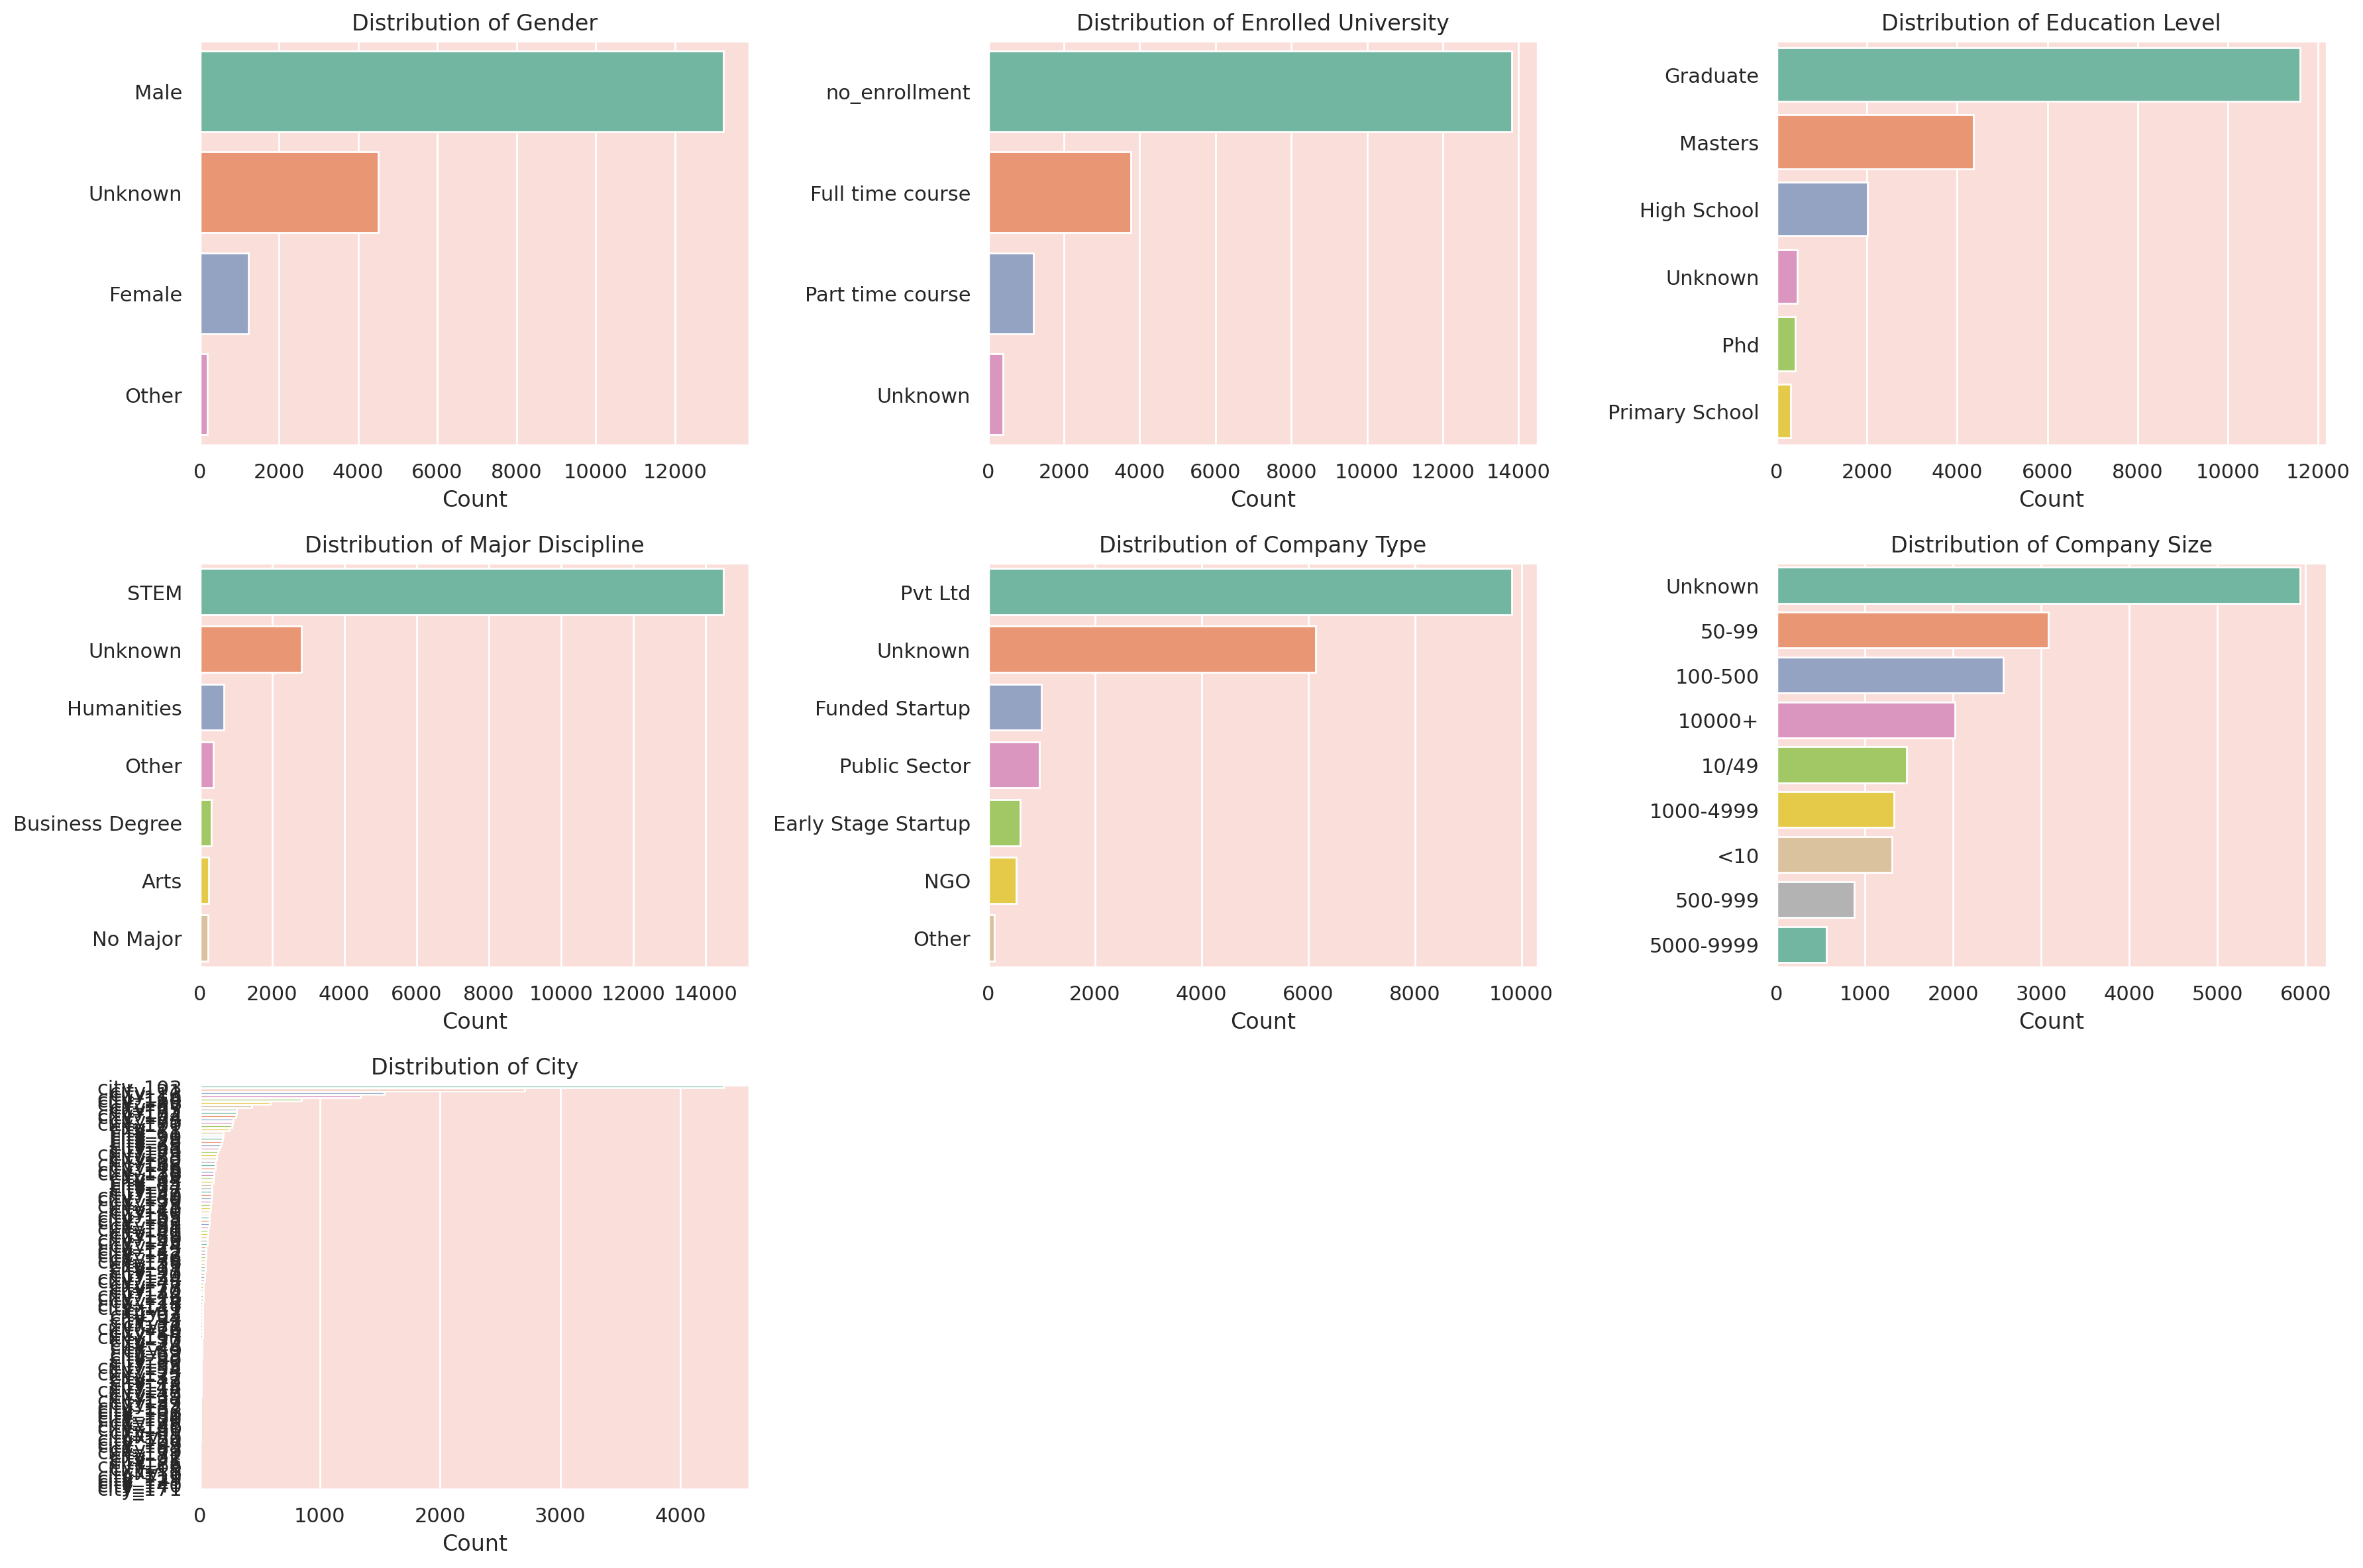

In [ ]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(y=col, data=train_df, order=train_df[col].value_counts().index, palette='Set2')
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel('Count')
    plt.ylabel('')

plt.tight_layout()
plt.show()


/tmp/ipython-input-3180513742.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_labels, y=target_counts.values, palette='Set2')


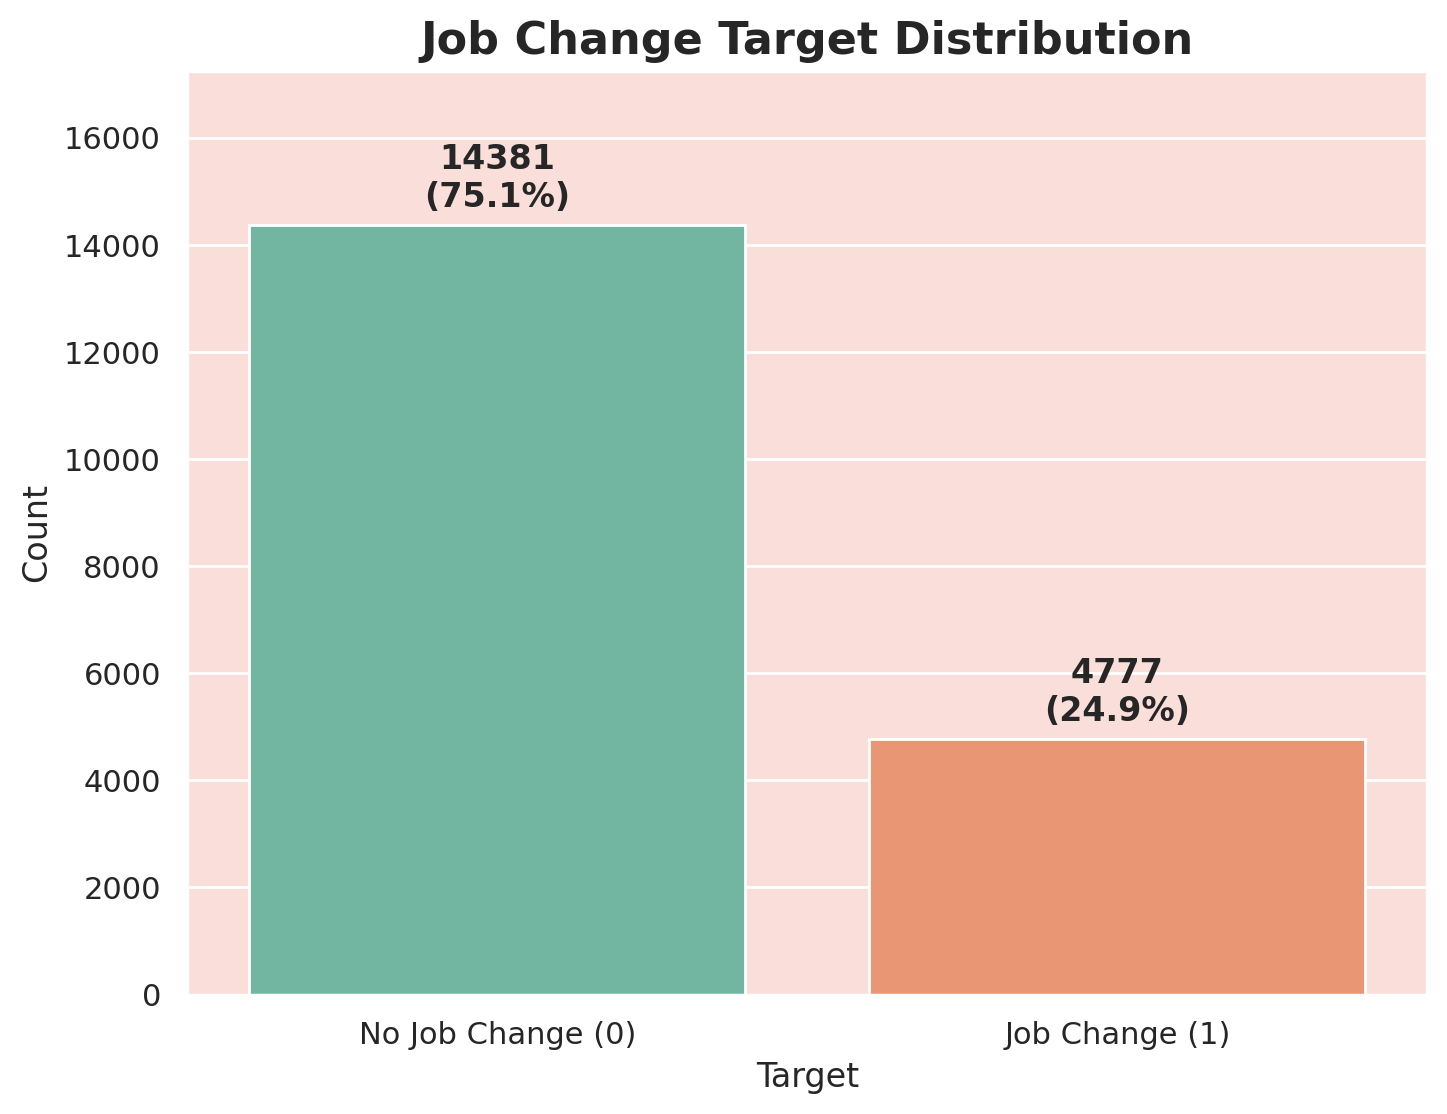

In [ ]:
# Count of each target class
target_counts = train_df['target'].value_counts()
target_labels = ['No Job Change (0)', 'Job Change (1)']
percentages = target_counts / target_counts.sum() * 100

# Set figure size
plt.figure(figsize=(8,6))

# Create barplot
sns.barplot(x=target_labels, y=target_counts.values, palette='Set2')

# Add count and percentage on top of each bar
for i, count in enumerate(target_counts.values):
    plt.text(i, count + 200, f'{count}\n({percentages[i]:.1f}%)',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Title and labels
plt.title('Job Change Target Distribution', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.ylim(0, max(target_counts.values)*1.2)  # Add space for text above bars

# Show plot
plt.show()


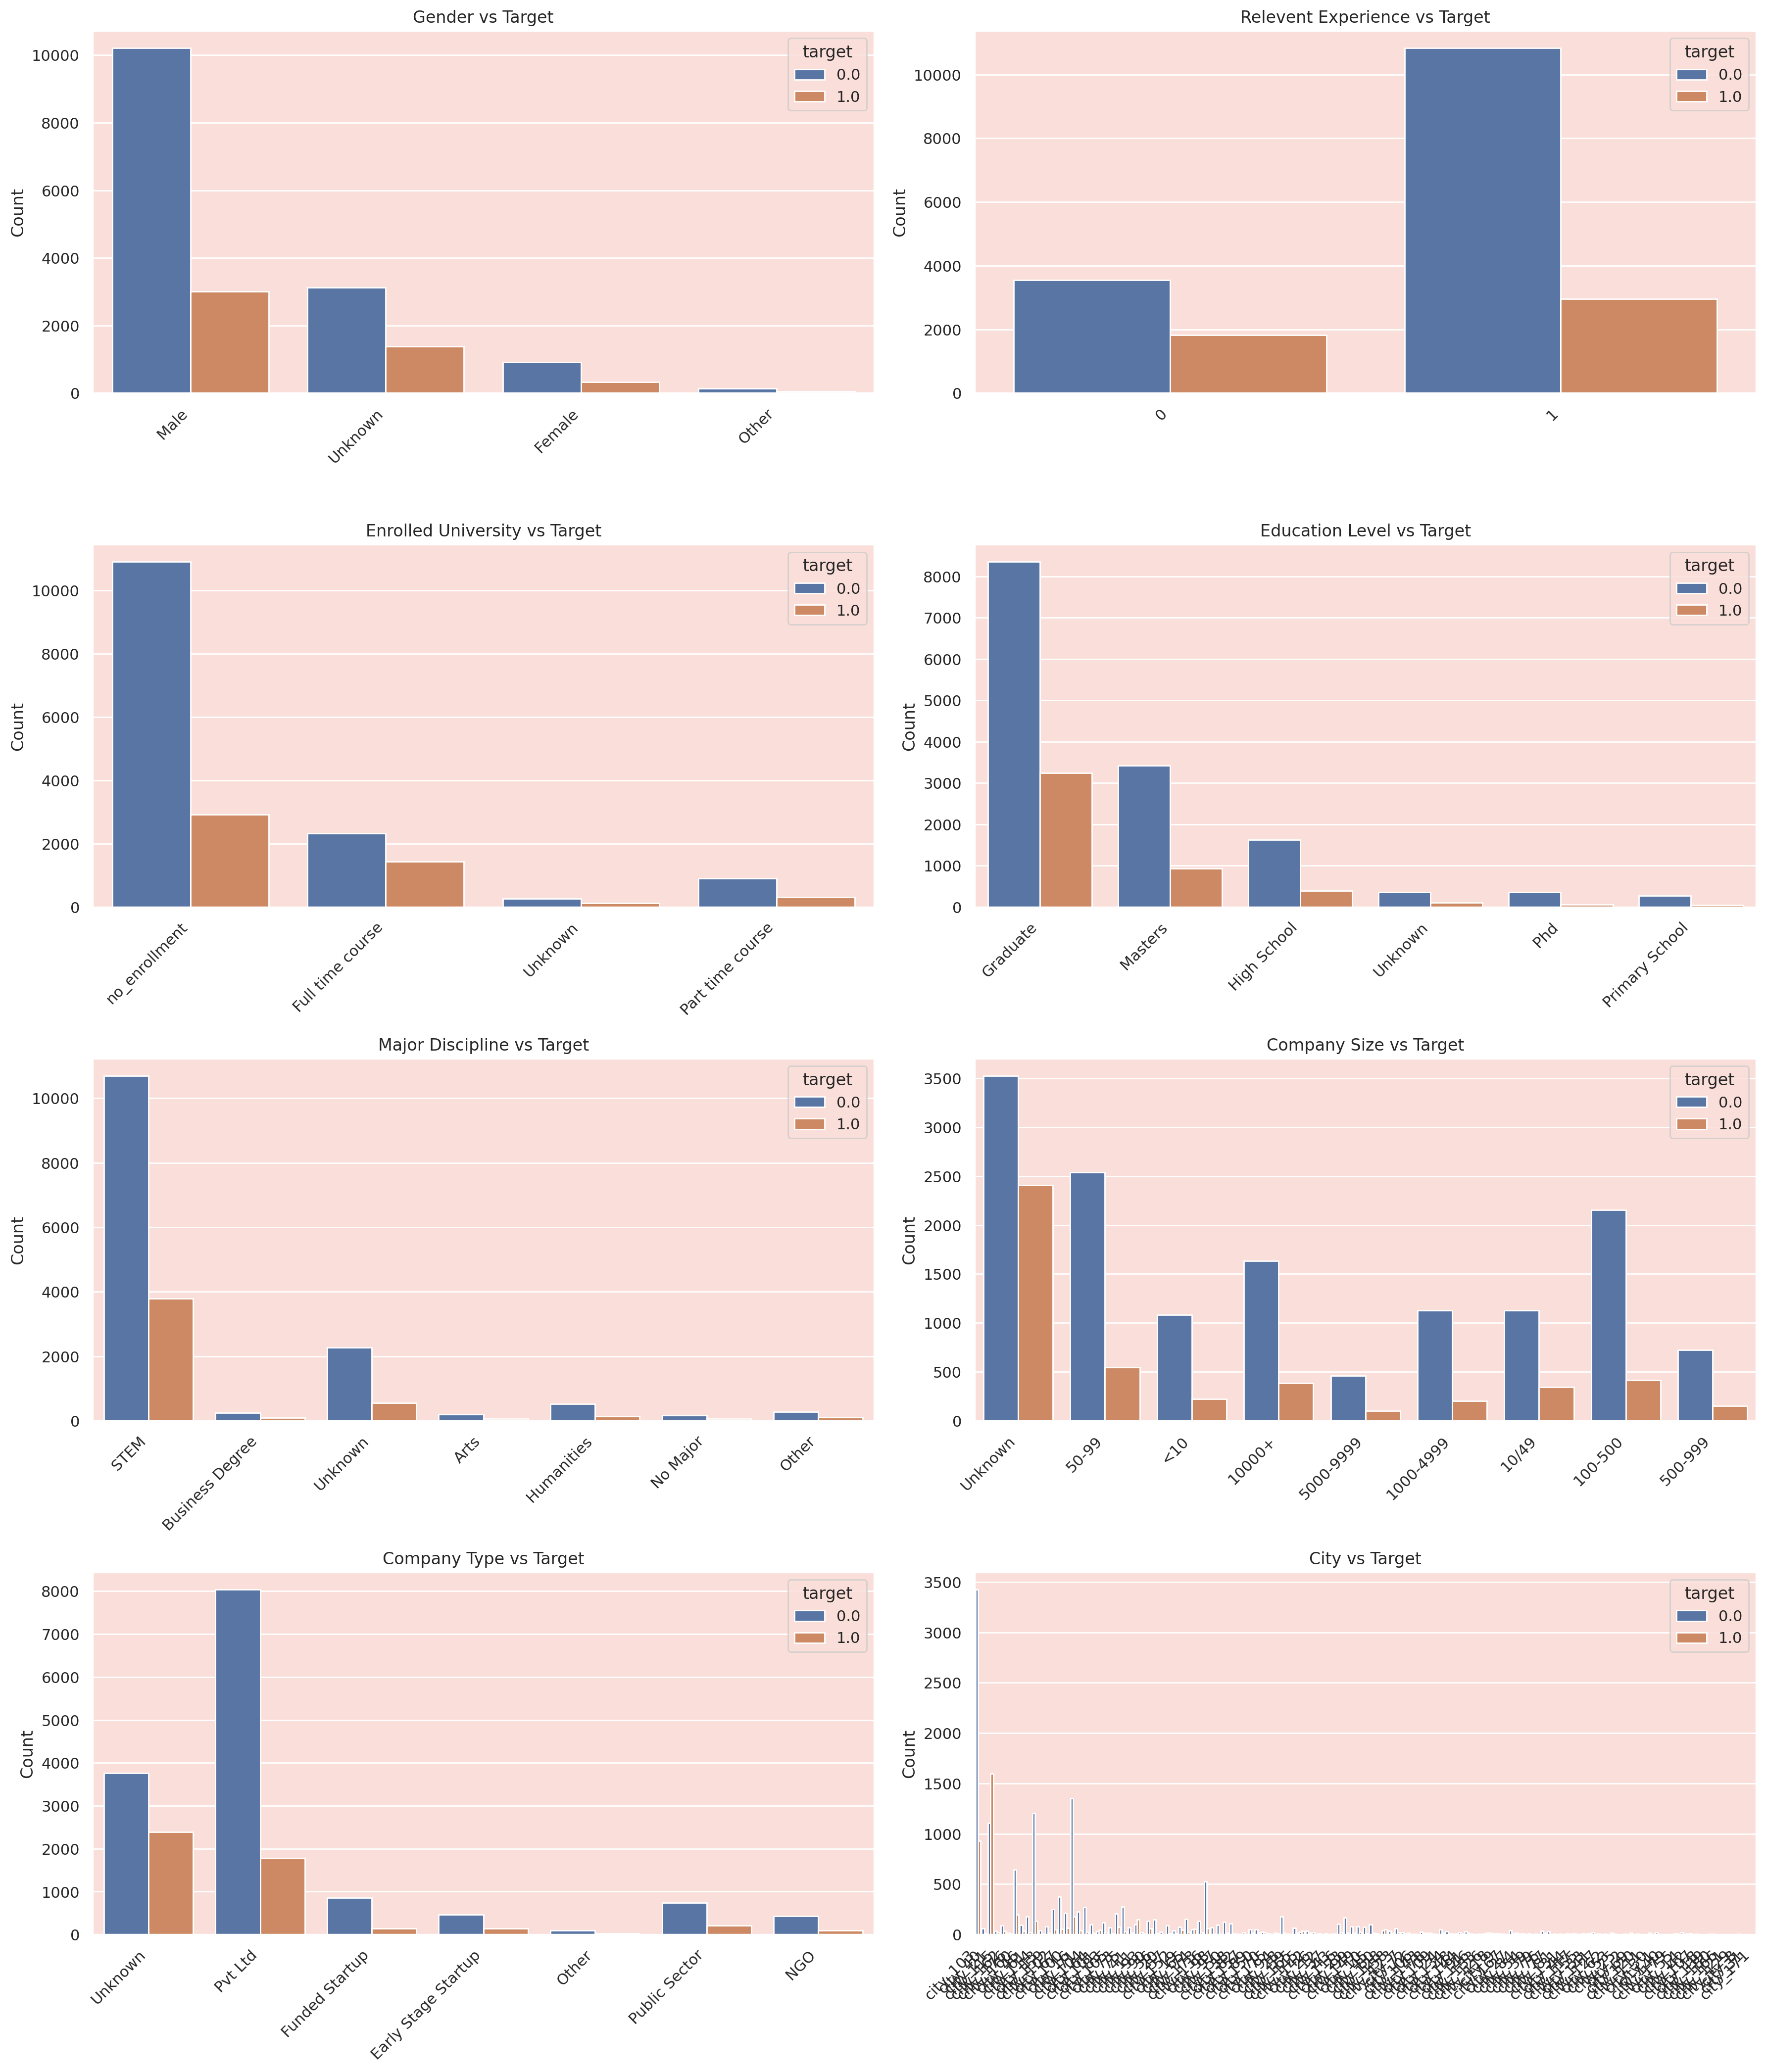

In [ ]:
# Categorical Features vs Target

cat_features_vs_target = [
    'gender',
    'relevent_experience',
    'enrolled_university',
    'education_level',
    'major_discipline',
    'company_size',
    'company_type',
    'city' # Including city as well
]

plt.figure(figsize=(18, 25))

for i, col in enumerate(cat_features_vs_target):
    plt.subplot(5, 2, i + 1)
    sns.countplot(x=col, hue='target', data=train_df)
    plt.title(f'{col.replace("_", " ").title()} vs Target')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

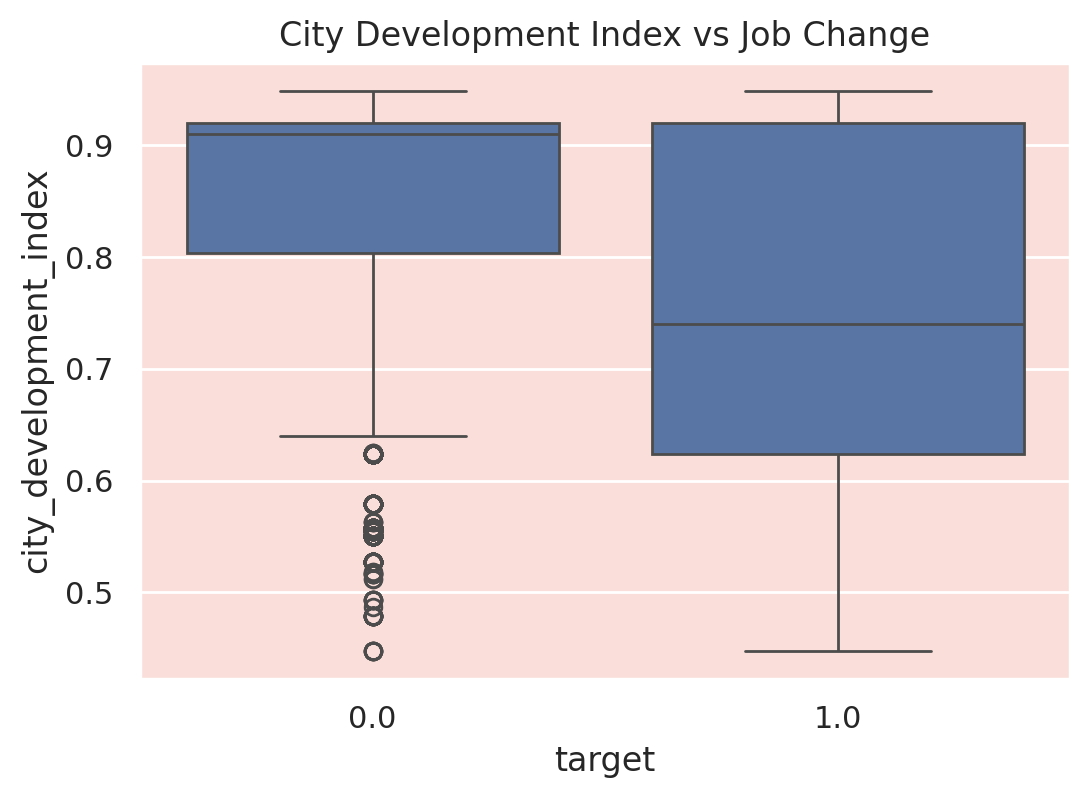

In [ ]:
# City Development Index vs Target
plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='city_development_index', data=train_df)
plt.title("City Development Index vs Job Change")
plt.show()

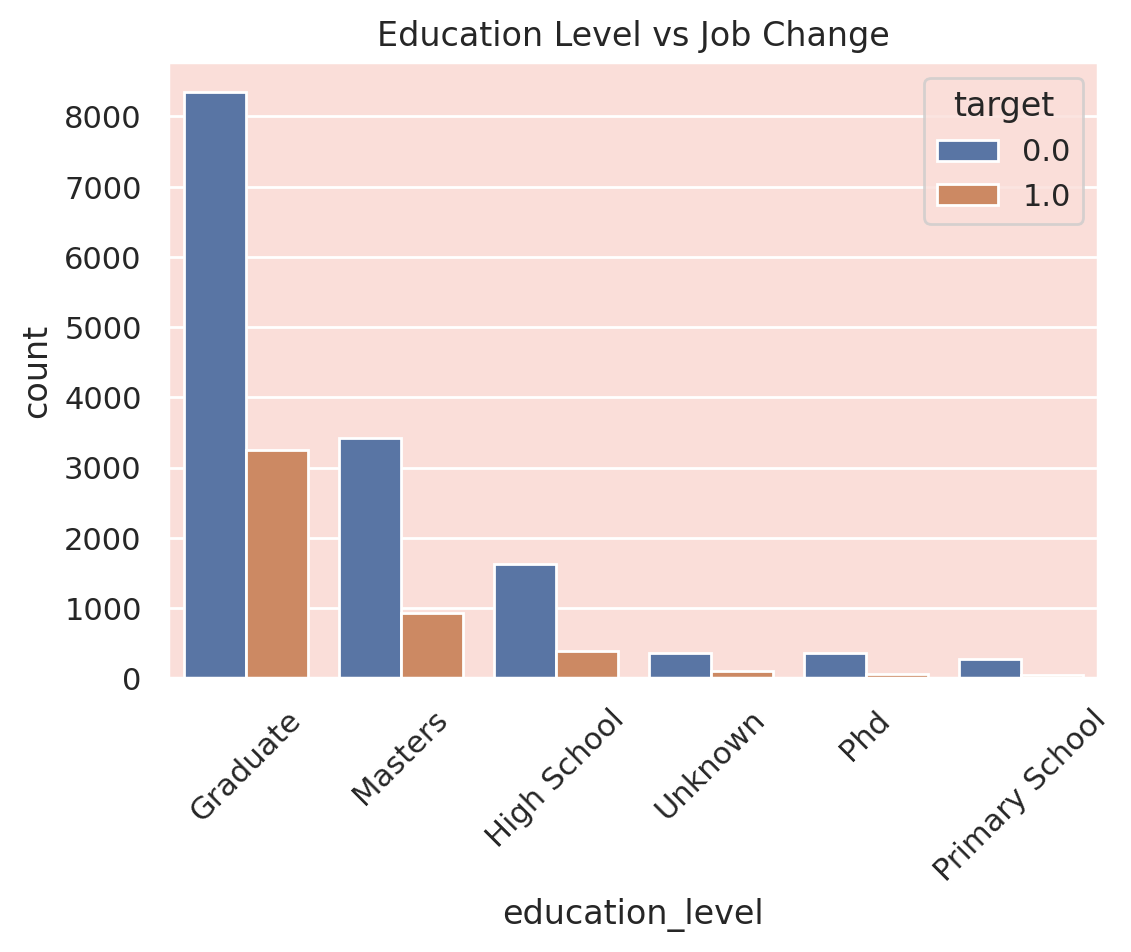

In [ ]:
# Education Level vs Target
plt.figure(figsize=(6,4))
sns.countplot(x='education_level', hue='target', data=train_df)
plt.title("Education Level vs Job Change")
plt.xticks(rotation=45)
plt.show()

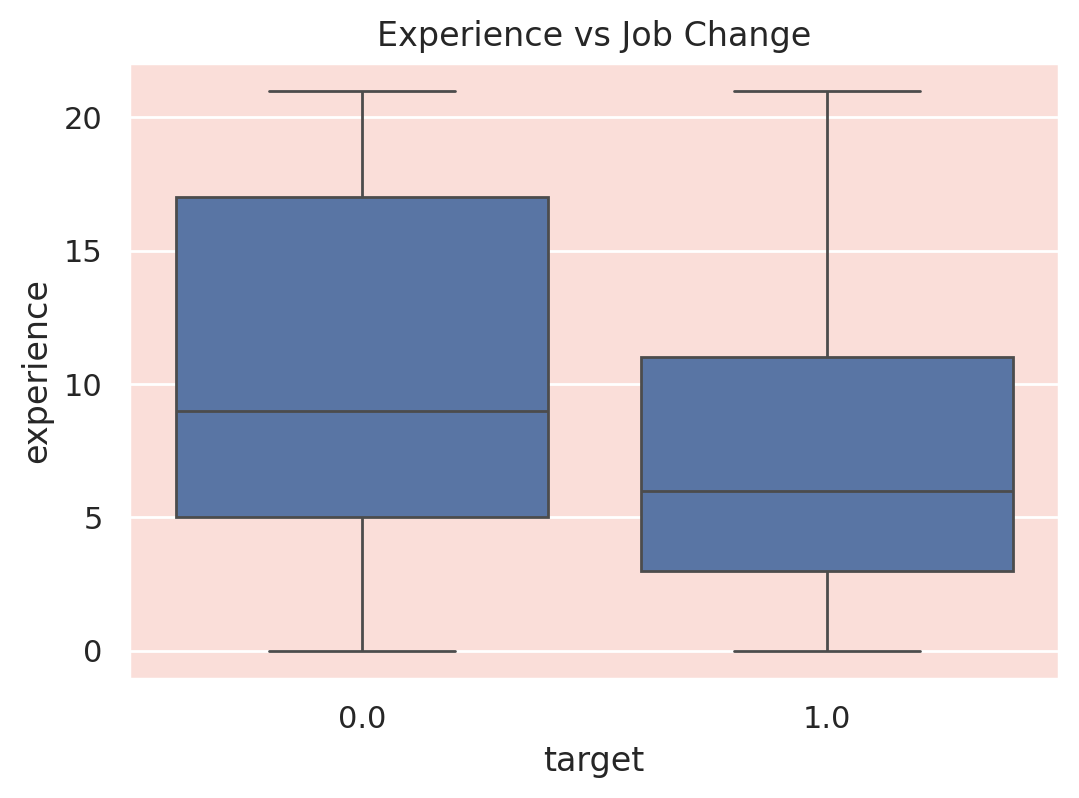

In [ ]:
# Experience vs Target
plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='experience', data=train_df)
plt.title("Experience vs Job Change")
plt.show()

In [ ]:
# Making Catagorical Index
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

categorical_features = [
    X_train.columns.get_loc(col) for col in cat_cols
]

# **Heat Map**
It's help us to understand the relationship between the varibale and it helps us to visualize the co relation between each coloumns and rows.

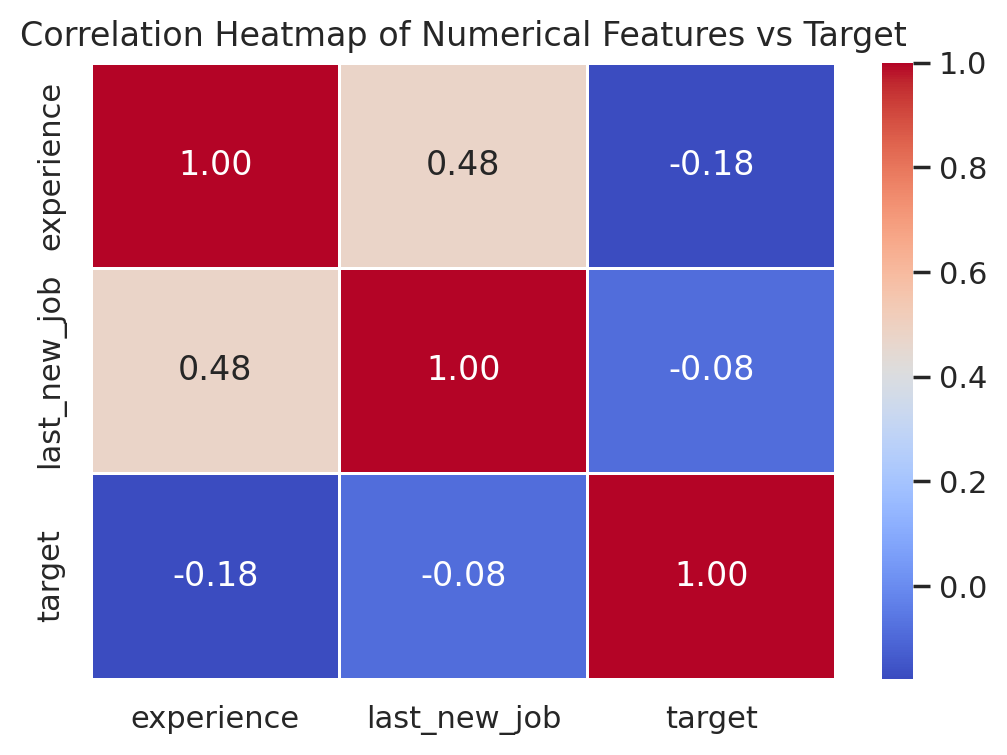

In [ ]:
plt.figure(figsize=(6,4))

corr = train_df[num_cols + ['target']].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features vs Target")
plt.show()



# **Pre-Processing**

In [ ]:
X = train_df.drop('target', axis=1)
y = train_df['target']

In [ ]:

smote_nc = SMOTENC(
    categorical_features=categorical_features,
    random_state=42
)

X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(y_train_res.value_counts())


target
0.0    14381
1.0     4777
Name: count, dtype: int64
target
1.0    14381
0.0    14381
Name: count, dtype: int64


In [ ]:

# Define test features ONCE
X_test = test_df.copy()

In [ ]:
# Encode original features

le_edu = LabelEncoder()

# Train: Fit LabelEncoder on the 'education_level' from the resampled training data (string labels)
le_edu.fit(X_train_res['education_level'])

# No in-place transformation for X_test here.
# The transformation will happen consistently later in tg8zCCRtoliz for both train and test.

LabelEncoder()

In [ ]:
# One Hot Encoding
X_train_enc = pd.get_dummies(X_train_res, drop_first=True)
# Split Data
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_enc,
    y_train_res,
    test_size=0.2,
    random_state=42,
    stratify=y_train_res
)


In [ ]:
# Standard Scaling
scaler = StandardScaler()

# Identify categorical columns that still need one-hot encoding
ohe_cols = ['gender', 'enrolled_university', 'major_discipline', 'company_type', 'company_size', 'city']

# Concatenate for consistent one-hot encoding. Both education_level columns should still be strings.
combined_df = pd.concat([X_train_res.drop(['enrollee_id'], axis=1), X_test.drop(['enrollee_id'], axis=1)], keys=['train', 'test'])

# Apply Label Encoding for 'education_level' before one-hot encoding other columns
combined_df['education_level'] = le_edu.transform(combined_df['education_level'])

# Apply One-Hot Encoding for other categorical columns
combined_df_encoded = pd.get_dummies(combined_df, columns=ohe_cols, drop_first=False)

# Split back into training and test sets
X_train_enc = combined_df_encoded.loc['train'].reset_index(drop=True)
X_test_enc = combined_df_encoded.loc['test'].reset_index(drop=True)

# Add 'enrollee_id' back as it's a discrete numerical identifier but not to be scaled
X_train_enc['enrollee_id'] = X_train_res['enrollee_id']
X_test_enc['enrollee_id'] = X_test['enrollee_id']

# Data Splitting - X_train_enc is the resampled and encoded training data
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_enc,
    y_train_res,
    test_size=0.2,
    random_state=42,
    stratify=y_train_res
)

# Drop enrollee_id before scaling if it should not be scaled
X_tr_to_scale = X_tr.drop('enrollee_id', axis=1)
X_val_to_scale = X_val.drop('enrollee_id', axis=1)
X_test_to_scale = X_test_enc.drop('enrollee_id', axis=1)

# --- UPDATED ROBUST COLUMN NAME CLEANING FOR XGBoost COMPATIBILITY ---
# Function to clean column names
def clean_col_names(df):
    cols = df.columns
    # Replace any character that is not alphanumeric or underscore with a single underscore
    cols = cols.str.replace(r'[^A-Za-z0-9_]+', '_', regex=True)
    # Replace multiple underscores with a single underscore
    cols = cols.str.replace(r'_+', '_', regex=True)
    # Remove leading/trailing underscores
    cols = cols.str.strip('_')
    df.columns = cols
    return df

X_tr_to_scale = clean_col_names(X_tr_to_scale)
X_val_to_scale = clean_col_names(X_val_to_scale)
X_test_to_scale = clean_col_names(X_test_to_scale)
# -----------------------------------------------------------------------

# Fit and transform the scaler
X_tr_scaled  = scaler.fit_transform(X_tr_to_scale)
X_val_scaled = scaler.transform(X_val_to_scale)
X_test_scaled = scaler.transform(X_test_to_scale)

# Convert back to DataFrame for models that expect feature names (like XGBoost for feature importance)
X_tr_scaled = pd.DataFrame(X_tr_scaled, columns=X_tr_to_scale.columns, index=X_tr.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val_to_scale.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_to_scale.columns, index=X_test_enc.index)

# **Base Line Model: Logistic Regration**

In [ ]:
# Base Line model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_tr_scaled, y_tr)


LogisticRegression(max_iter=1000)

In [ ]:
y_val_pred = lr.predict(X_val_scaled)
print(classification_report(y_val, y_val_pred))
y_val_prob = lr.predict_proba(X_val_scaled)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_prob)
print("ROC-AUC:", roc_auc)

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82      2877
         1.0       0.81      0.84      0.83      2876

    accuracy                           0.83      5753
   macro avg       0.83      0.83      0.83      5753
weighted avg       0.83      0.83      0.83      5753

ROC-AUC: 0.88283170490819


# **Tree Base Model: Random Forest**

In [ ]:
# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

# Use scaled and cleaned data for training and prediction
rf.fit(X_tr_scaled, y_tr)

y_val_pred_rf = rf.predict(X_val_scaled)
y_val_prob_rf = rf.predict_proba(X_val_scaled)[:,1]

In [ ]:
print(classification_report(y_val, y_val_pred_rf))
print("RF ROC-AUC:", roc_auc_score(y_val, y_val_prob_rf))

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      2877
         1.0       0.84      0.83      0.84      2876

    accuracy                           0.84      5753
   macro avg       0.84      0.84      0.84      5753
weighted avg       0.84      0.84      0.84      5753

RF ROC-AUC: 0.9118755387193911


# **Gradian Boosting Model: XGBoost**

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:30:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85      2877
         1.0       0.85      0.87      0.86      2876

    accuracy                           0.86      5753
   macro avg       0.86      0.86      0.86      5753
weighted avg       0.86      0.86      0.86      5753

XGBoost ROC-AUC: 0.9257787290017272


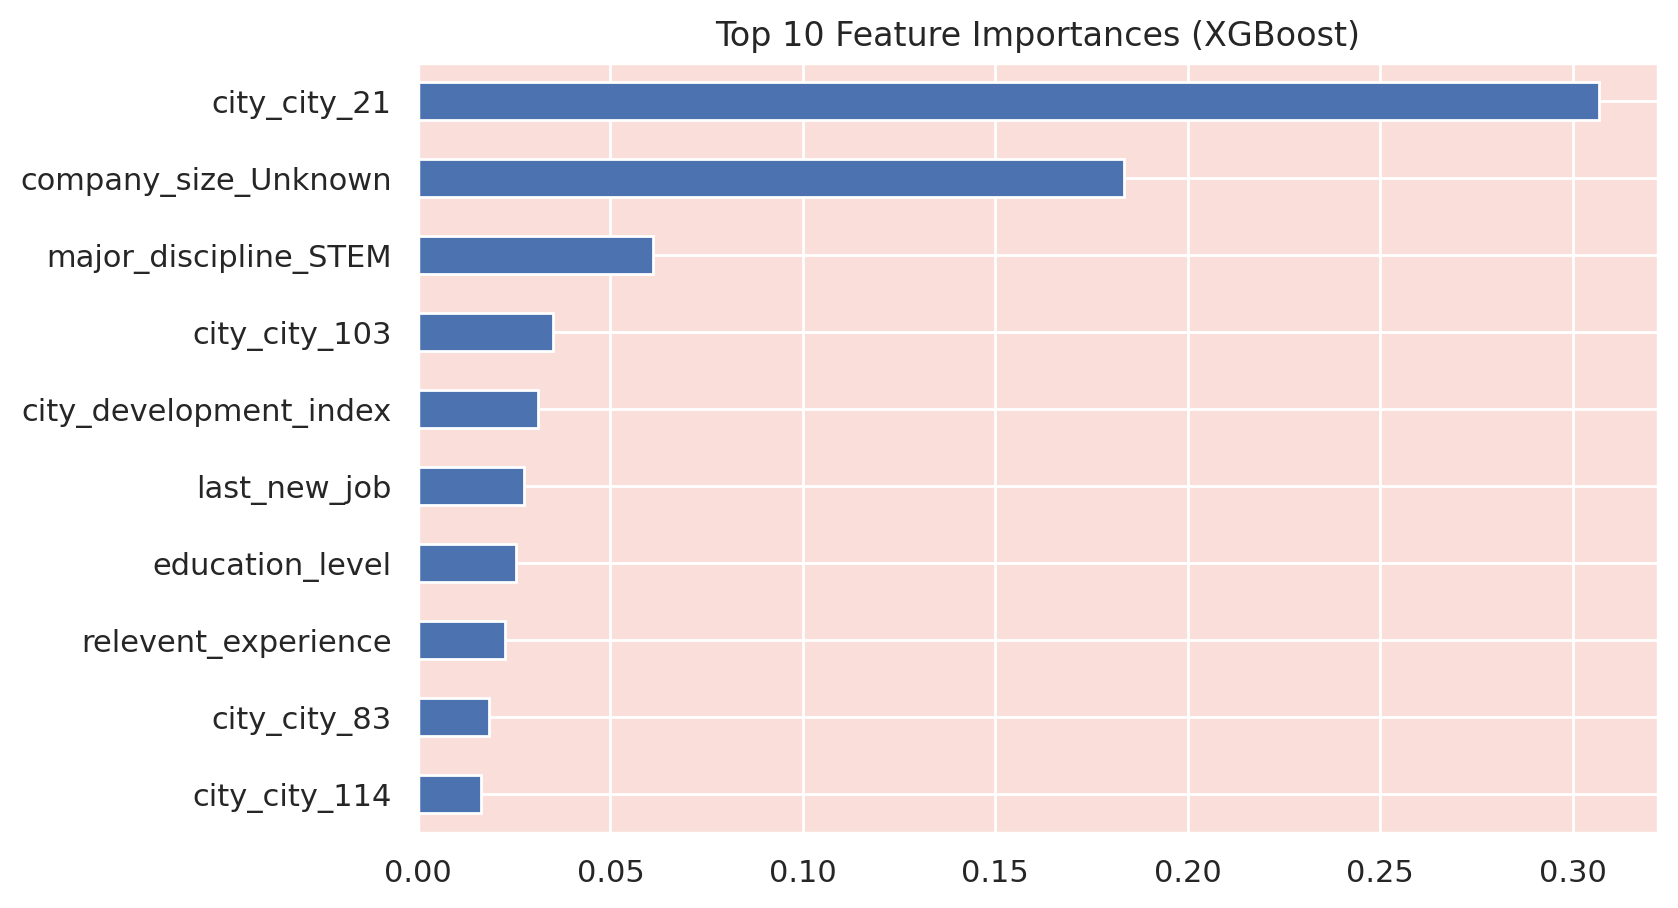

In [ ]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Use scaled and cleaned data for training and prediction
xgb.fit(X_tr_scaled, y_tr)

y_val_pred_xgb = xgb.predict(X_val_scaled)
y_val_prob_xgb = xgb.predict_proba(X_val_scaled)[:,1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_val, y_val_pred_xgb))
print("XGBoost ROC-AUC:", roc_auc_score(y_val, y_val_prob_xgb))

feat_imp = pd.Series(
    xgb.feature_importances_,
    index=X_tr_scaled.columns # Use columns from the scaled data
).sort_values(ascending=False)

# Top 10
plt.figure(figsize=(8,5))
feat_imp.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Use the consistently preprocessed and scaled test data
test_pred = xgb.predict(X_test_scaled)
test_prob = xgb.predict_proba(X_test_scaled)[:, 1]

# Create a DataFrame for submission (example)
# Note: enrollee_id was dropped before scaling, so we retrieve it from the original X_test
submission_df = pd.DataFrame({'enrollee_id': X_test['enrollee_id'], 'target': test_prob})
print("Predicted Probabilities for Test Data:")
print(submission_df.head())

Predicted Probabilities for Test Data:
   enrollee_id    target
0        32403  0.171439
1         9858  0.607483
2        31806  0.576325
3        27385  0.118858
4        27724  0.059994


# **Interfer**
We use several models like-

*   Logistic Regression
*   Random Forest
*   XGBoost

By using this model technique  we get the best one that's is XGBoost . It help us to over all undestaanding of Job changing path.

In [ ]:
test_output = test_df.copy()
test_output['Predicted_Job_Change'] = test_pred
test_output['Prediction_Probability'] = test_prob

print("Test Data with Predictions:")
test_output.head()

Test Data with Predictions:


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,Predicted_Job_Change,Prediction_Probability
0,32403,city_41,0.827,Male,1,Full time course,Graduate,STEM,9.0,<10,Unknown,1.0,21,0,0.171439
1,9858,city_103,0.920,Female,1,no_enrollment,Graduate,STEM,5.0,Unknown,Pvt Ltd,1.0,98,1,0.607483
2,31806,city_21,0.624,Male,0,no_enrollment,High School,Unknown,0.0,Unknown,Pvt Ltd,0.0,15,1,0.576325
3,27385,city_13,0.827,Male,1,no_enrollment,Masters,STEM,11.0,10/49,Pvt Ltd,1.0,39,0,0.118858
4,27724,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,21.0,10000+,Pvt Ltd,5.0,72,0,0.059994


/tmp/ipython-input-4174660705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=test_output['Predicted_Job_Change'], palette='viridis')


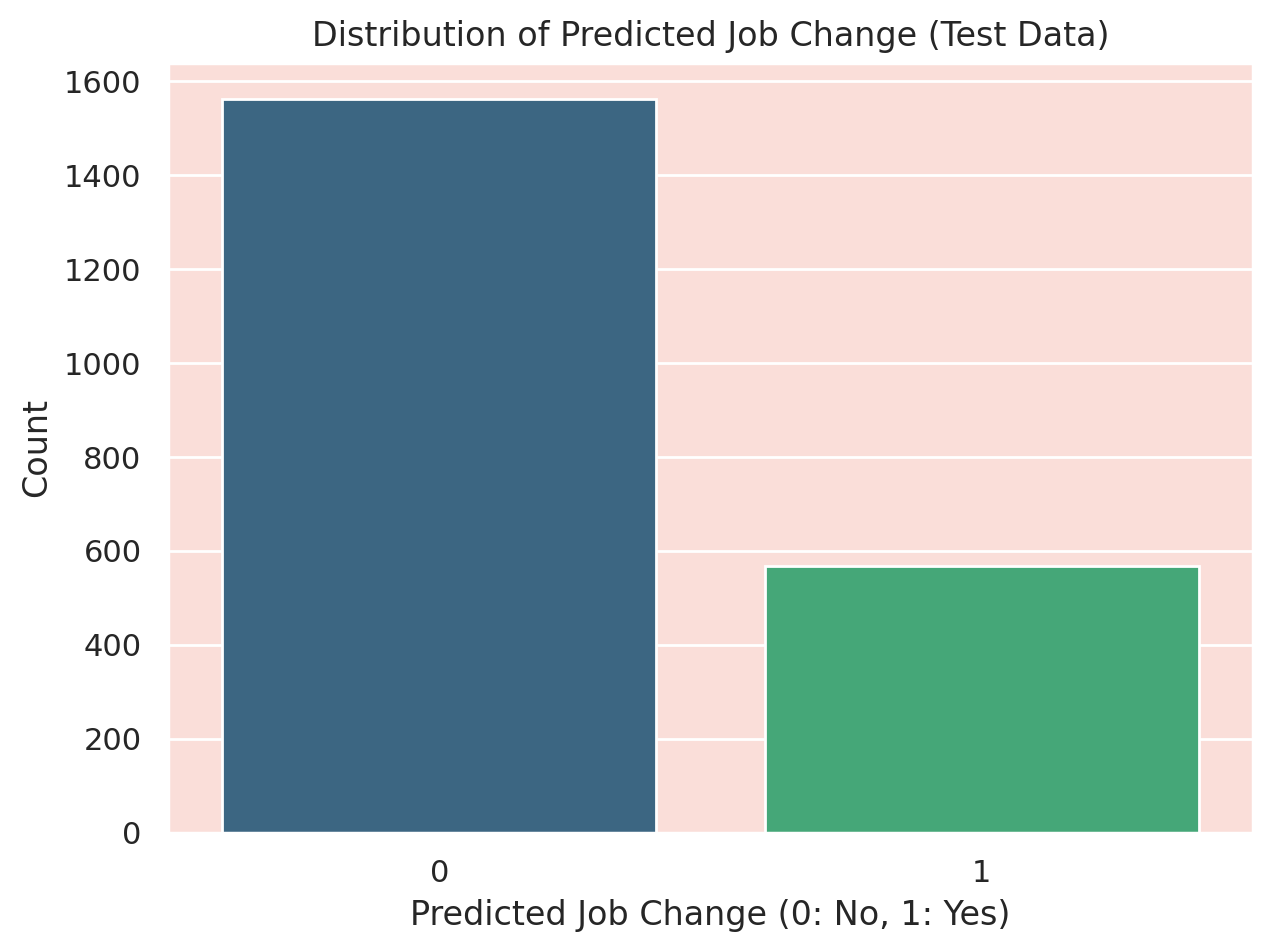

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=test_output['Predicted_Job_Change'], palette='viridis')
plt.title("Distribution of Predicted Job Change (Test Data)")
plt.xlabel("Predicted Job Change (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

# **Step 9 | Model Evaluation & Interpretation**
Here we done confusion matrix, ROC comparison in 3 models, Recall-precion comparison among 3 model. It's evaluate the work flow , define the acurate and best model and it's helps for better understanding.

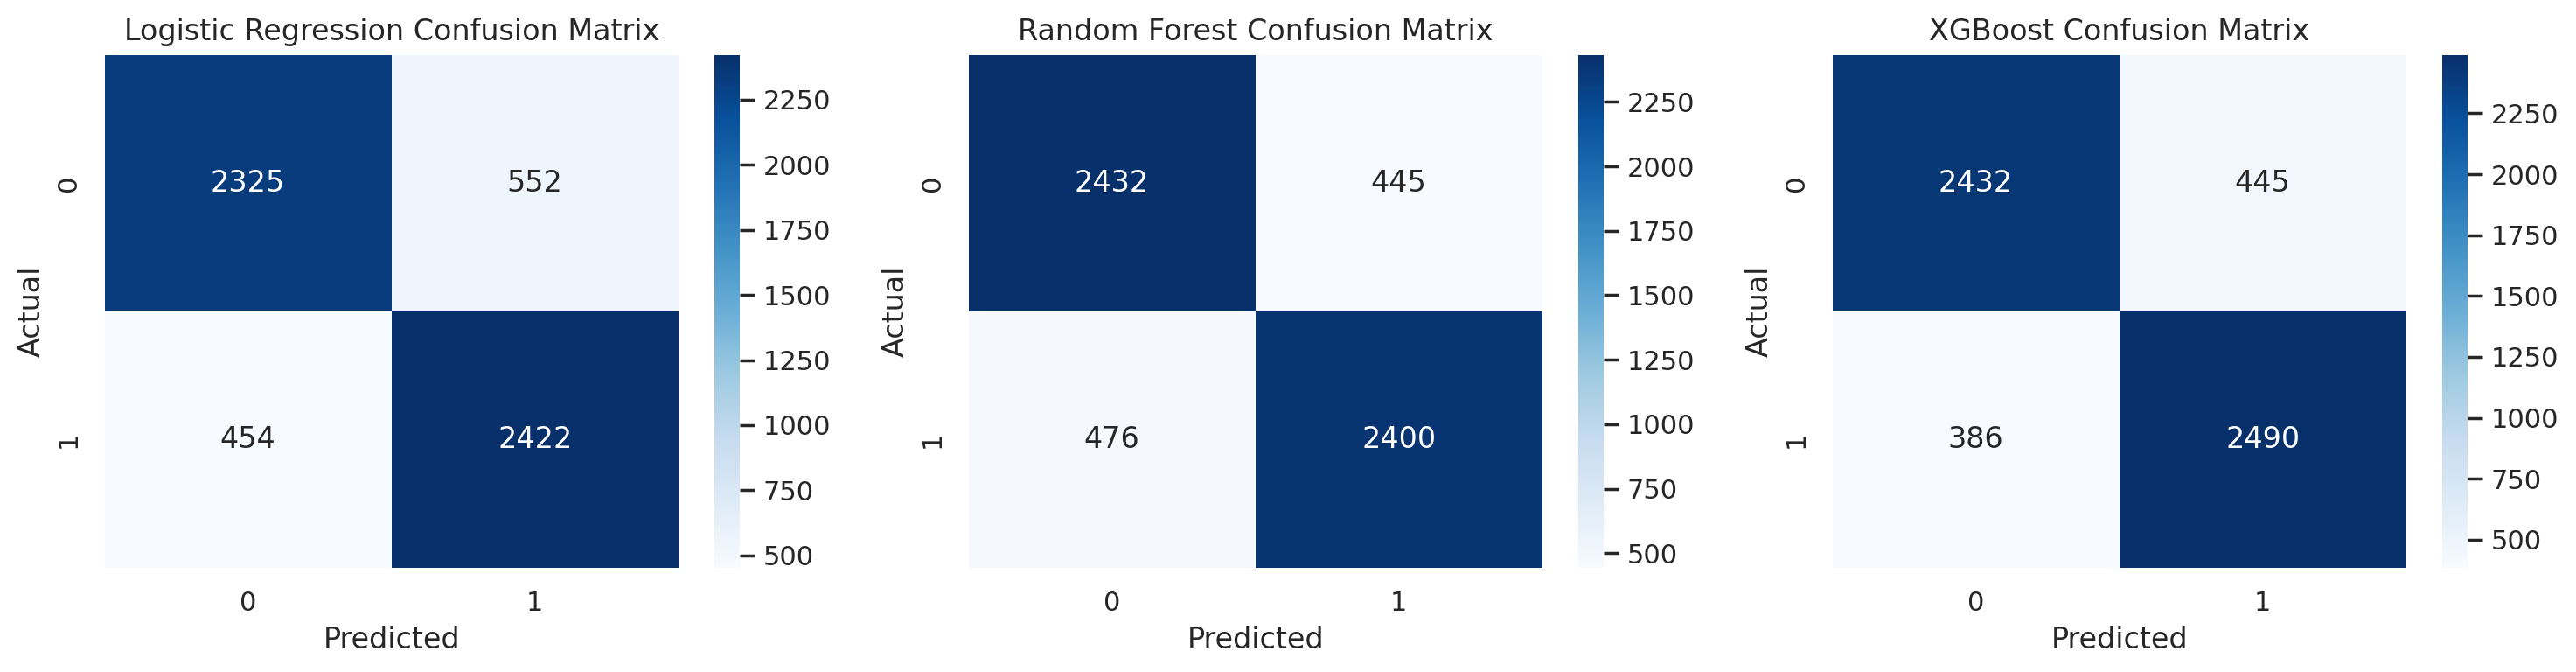

In [ ]:
models = {
    'Logistic Regression': y_val_pred,
    'Random Forest': y_val_pred_rf,
    'XGBoost': y_val_pred_xgb
}

plt.figure(figsize=(15,4))

for i, (name, preds) in enumerate(models.items()):
    cm = confusion_matrix(y_val, preds)
    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

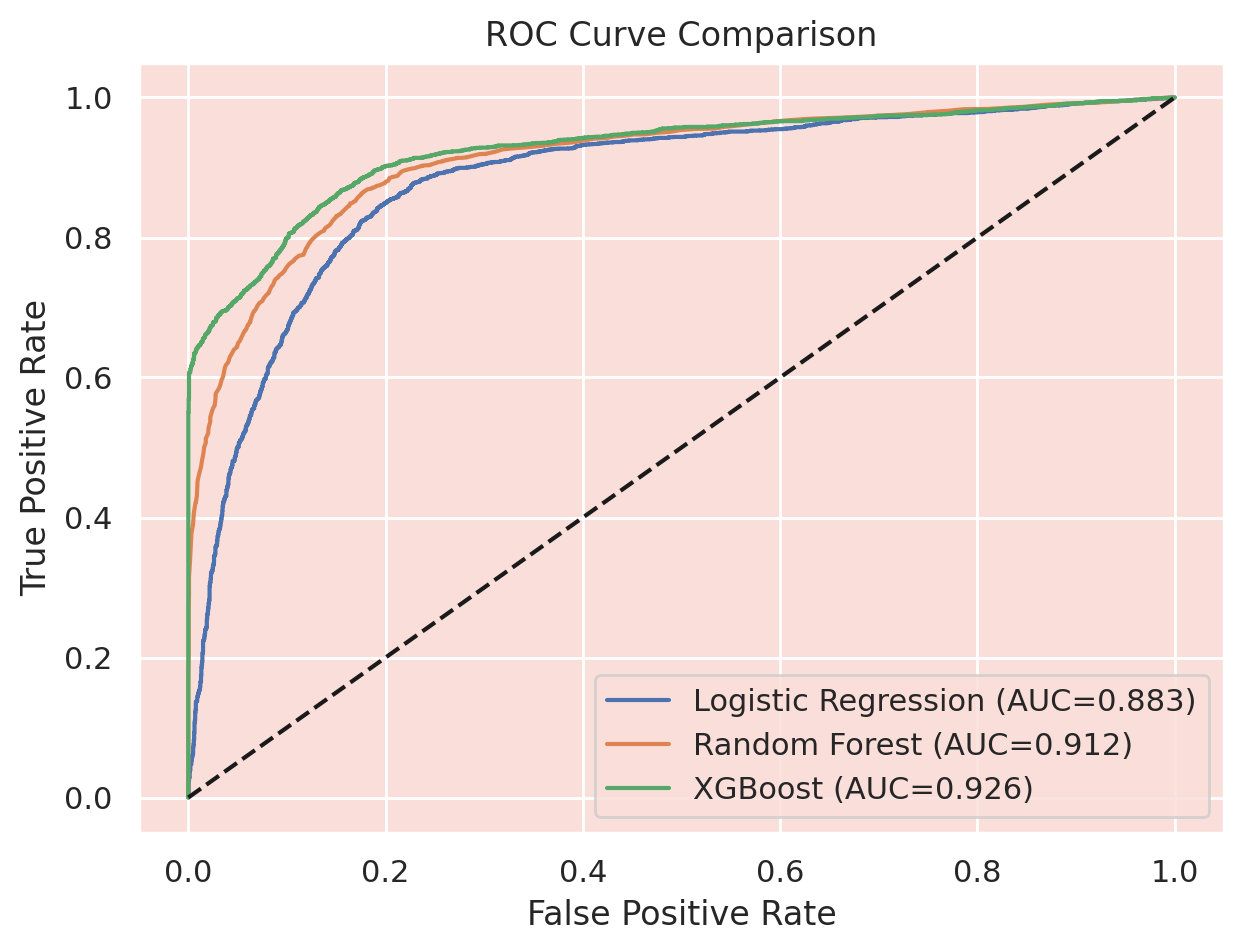

In [ ]:
plt.figure(figsize=(7,5))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_val_prob)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={roc_auc_score(y_val, y_val_prob):.3f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_score(y_val, y_val_prob_rf):.3f})')

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_val_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={roc_auc_score(y_val, y_val_prob_xgb):.3f})')

# Plot formatting
plt.plot([0,1], [0,1], 'k--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

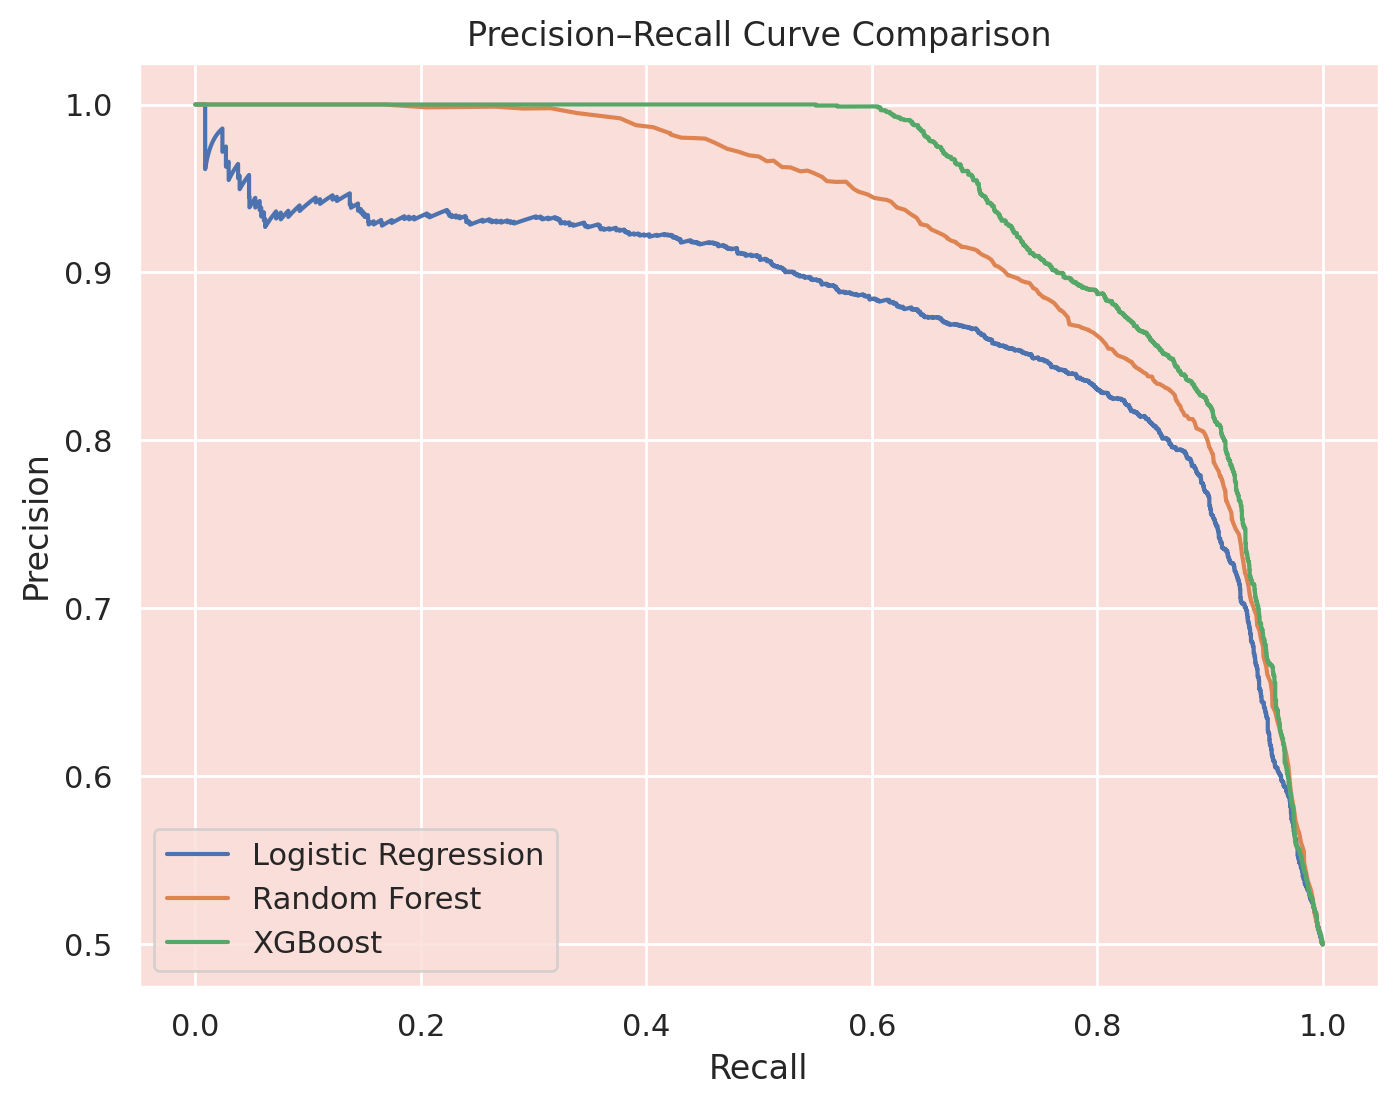

In [ ]:
# Get predicted probabilities (IMPORTANT: use probability, not predict())
lr_probs = lr.predict_proba(X_val_scaled)[:, 1]
rf_probs = rf.predict_proba(X_val_scaled)[:, 1]
# Note: The original code used 'gb_model' but the XGBoost model is named 'xgb'
gb_probs = xgb.predict_proba(X_val_scaled)[:, 1]

# Precision-Recall values
from sklearn.metrics import precision_recall_curve, auc
lr_precision, lr_recall, _ = precision_recall_curve(y_val, lr_probs)
rf_precision, rf_recall, _ = precision_recall_curve(y_val, rf_probs)
gb_precision, gb_recall, _ = precision_recall_curve(y_val, gb_probs)

# Plot
plt.figure(figsize=(8, 6))

plt.plot(lr_recall, lr_precision, label='Logistic Regression')
plt.plot(rf_recall, rf_precision, label='Random Forest')
plt.plot(gb_recall, gb_precision, label='XGBoost') # Changed label from Gradient Boosting to XGBoost

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve Comparison')
plt.legend()
plt.grid(True)

plt.show()

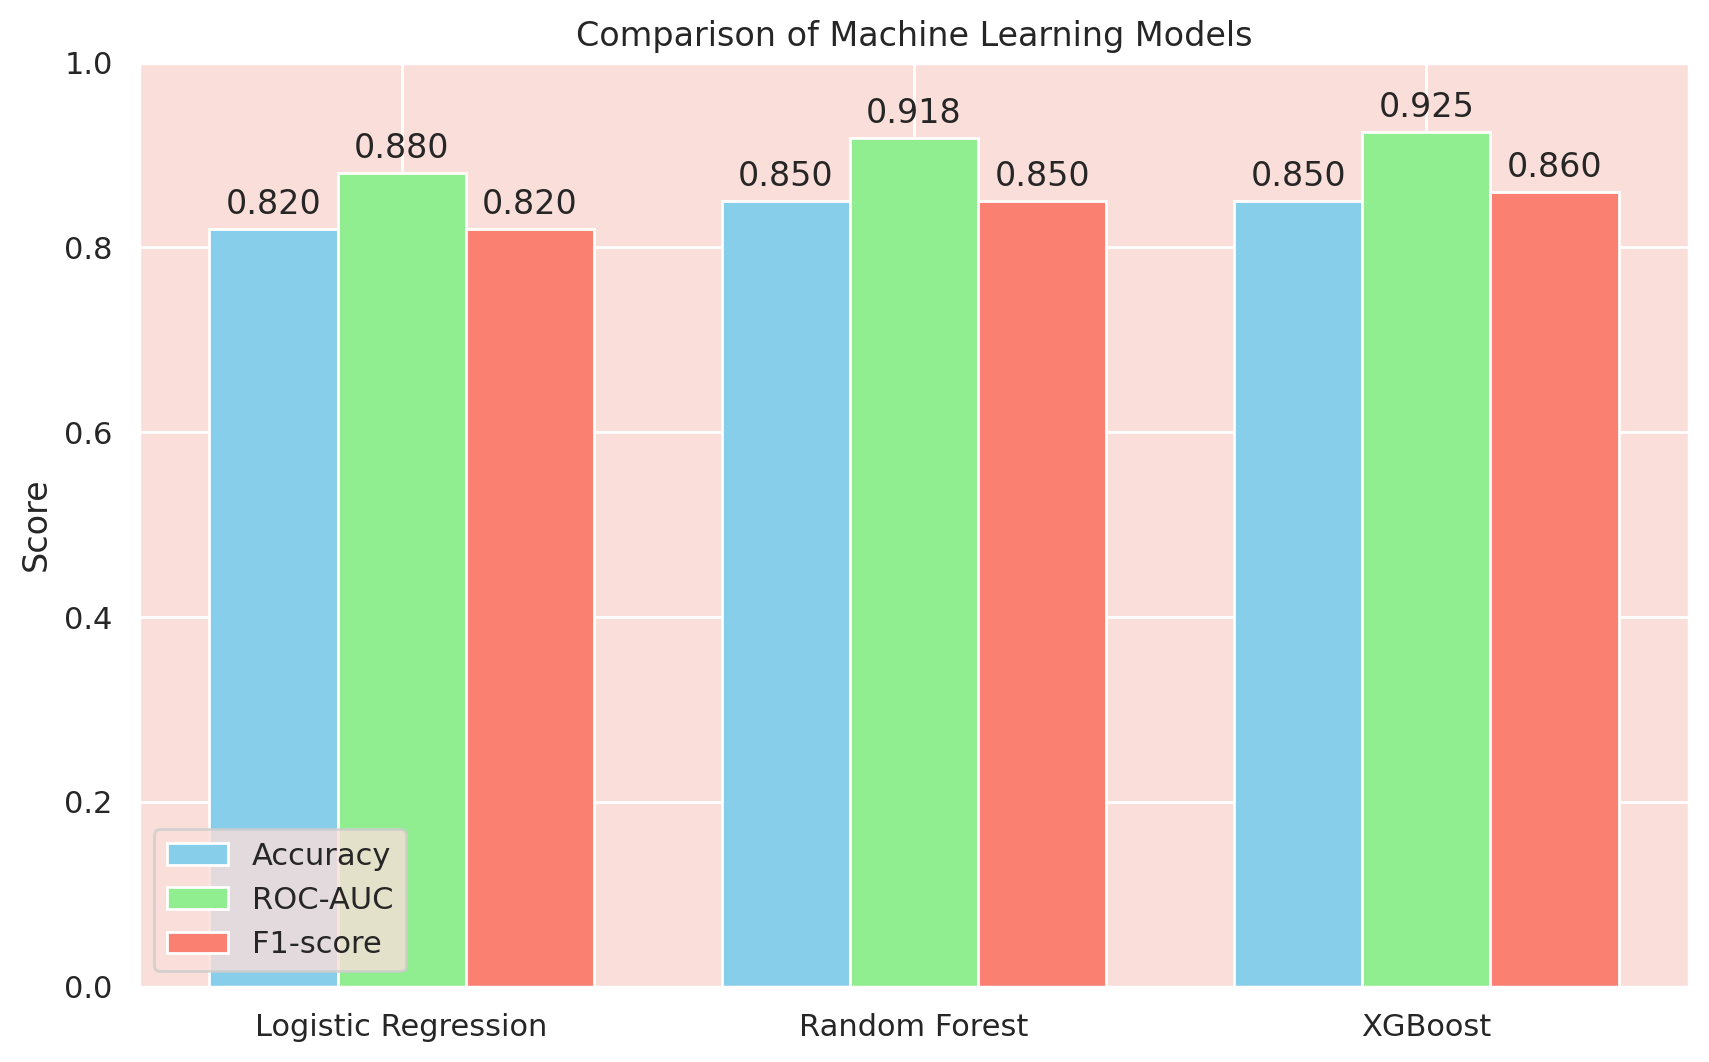

In [ ]:

# Metrics for each model
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy = [0.82, 0.85, 0.85]
roc_auc = [0.88, 0.918, 0.925]
f1_score = [0.82, 0.85, 0.86]  # use weighted F1-score

x = np.arange(len(models))  # label locations
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(10,6))

# Bars
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x, roc_auc, width, label='ROC-AUC', color='lightgreen')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score', color='salmon')

# Labels and title
ax.set_ylabel('Score')
ax.set_ylim(0,1)
ax.set_title('Comparison of Machine Learning Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bars
def annotate_bars(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(rects1)
annotate_bars(rects2)
annotate_bars(rects3)

plt.show()

# **Step 10 | Predection**
It's for my test data where I test my data set and get the result . Where we can understand the what our model do in unseen data.

In [ ]:
test_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,1,Full time course,Graduate,STEM,9.0,<10,Unknown,1.0,21
1,9858,city_103,0.920,Female,1,no_enrollment,Graduate,STEM,5.0,Unknown,Pvt Ltd,1.0,98
2,31806,city_21,0.624,Male,0,no_enrollment,High School,Unknown,0.0,Unknown,Pvt Ltd,0.0,15
3,27385,city_13,0.827,Male,1,no_enrollment,Masters,STEM,11.0,10/49,Pvt Ltd,1.0,39
4,27724,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,21.0,10000+,Pvt Ltd,5.0,72


In [ ]:
'target' in test_df.columns

False

# **Step 11 | Conclusion**
We get 2 part of data 1 part for train and another for test. By doing all thing we get a good result that's means the model is working well.

**Thank You**

**Best regards☺️**